In [48]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [49]:
df_analise = pd.read_csv('../../material/base_final_s14_olist.csv')
df_analise

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,reference_month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-01,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-07-01,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-08-01,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-11-01,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-01,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110192,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-02-01,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,11722,praia grande,SP
110193,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-08-01,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,45920,nova vicosa,BA
110194,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-01-01,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,28685,japuiba,RJ
110195,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-01-01,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,28685,japuiba,RJ


Menor valor de compra pelo mes e por estado. Com tintuito de aproveitar as ofertas de mercado.

In [50]:
df_mes = df_analise[['reference_month','price','customer_state']]
df_mes

,reference_month,price,customer_state
0,2017-10-01,29.99,SP
1,2018-07-01,118.70,BA
2,2018-08-01,159.90,GO
3,2017-11-01,45.00,RN
4,2018-02-01,19.90,SP
...,...,...,...
110192,2018-02-01,174.90,SP
110193,2017-08-01,205.99,BA
110194,2018-01-01,179.99,RJ
110195,2018-01-01,179.99,RJ


In [51]:
df_mes_agrupado = df_mes.groupby(['customer_state','reference_month', ])['price'].sum().sort_values(ascending = True)
df_mes_agrupado

customer_state  reference_month
PR              2016-12-01             10.90
RR              2016-10-01             39.70
                2017-09-01             39.99
MT              2016-10-01             47.80
RR              2017-04-01             48.95
                                     ...    
SP              2018-01-01         368611.43
                2018-03-01         377034.34
                2018-08-01         387733.71
                2018-04-01         391246.99
                2018-05-01         424628.36
Name: price, Length: 556, dtype: float64

In [52]:
df_mes_agrupado_top3 = df_mes_agrupado.head(3)
df_mes_agrupado_top3

customer_state  reference_month
PR              2016-12-01         10.90
RR              2016-10-01         39.70
                2017-09-01         39.99
Name: price, dtype: float64

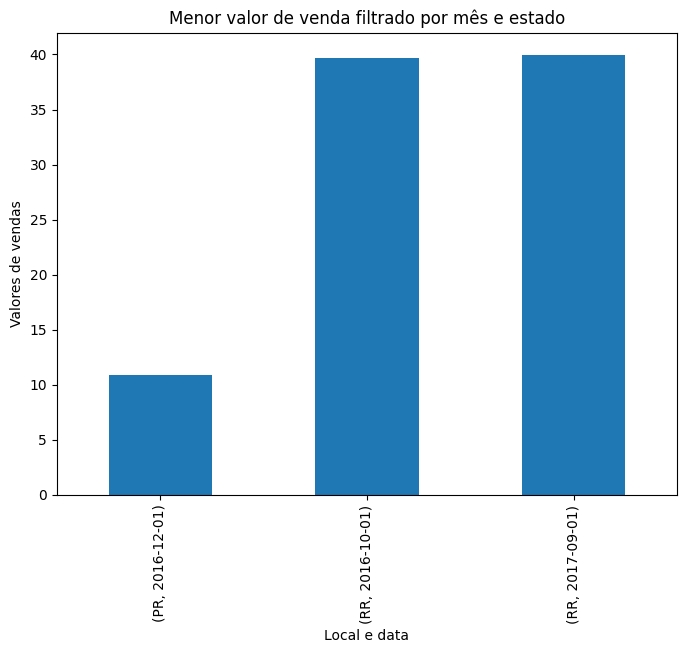

In [67]:
plt.figure(figsize=(8, 6))

df_mes_agrupado_top3.plot(kind='bar')
plt.title('Menor valor de venda filtrado por mês e estado')
plt.xlabel('Local e data')
plt.ylabel('Valores de vendas')
plt.show()

Horario comum de entrega por cidade. Com intuito de ter ua base para progamação pessoal enventualmente.

In [64]:
moda_customer_city = df_analise['customer_city'].mode()[0]
moda_customer_city 


'sao paulo'

In [66]:

df_frequencia_entrega = df_analise.groupby('order_purchase_timestamp').agg({'customer_city': 'nunique'})
df_frequencia_entrega.sort_values(by='customer_city', ascending=False)

,customer_city
order_purchase_timestamp,
2017-11-20 11:46:30,3
2018-07-28 13:11:22,3
2018-08-02 12:05:26,3
2017-11-20 10:59:08,3
2018-08-02 12:06:09,3
...,...
2017-11-09 19:02:02,1
2017-11-09 18:53:35,1
2017-11-09 18:53:00,1
